<a href="https://colab.research.google.com/github/singh00in/AIML/blob/main/Hackathon/Hackathon_Sample_Code_(1)_(1)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing necessary libraries

In [ ]:
!pip install pandas==2.2.2 numpy==2.0.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 -q

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# to visualize data
import seaborn as sns
# to split the data into train and test sets
from sklearn.model_selection import train_test_split
# to build a linear regression model
from sklearn.linear_model import LinearRegression
# to check a regression model's performance
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

**Loading the Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Restra full Data **

In [3]:
# checking full data
restadf=pd.read_csv('/content/drive/MyDrive/PG-AIML/Hackathon/Restra_Data_Dictionary.csv')
restadf.head()

,S No.,Variable Name,Variable Description
0,1,Registration Number,This is a restaurant ID
1,2,Annual Turnover,Annual revenue of the restaurant in INR
2,3,Cuisine,Type of cuisine served in the restaurant
3,4,City,City at which the restaurant is located
4,5,Restaurant Location,This variable determines whether the restauran...


# Loading the Training Data and using the Training Data to build the Model

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/PG-AIML/Hackathon/Train_dataset.csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


Making copy of the dataset

In [5]:
df_train_copy = df_train.copy()
df_train_copy.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


checking the shape of the dataset

In [6]:
df_train_copy.shape

(3493, 34)

checking info of the dataset

In [12]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

checking the duplicate value

In [13]:
df_train_copy.duplicated().sum()

np.int64(0)

In [78]:
## Checking for the null values

df_train_copy.shape

(3493, 33)

Getting Statsitical value

In [14]:
df_train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Registration Number,3493.0,6.174700e+04,1.008487e+03,60001.0,60874.0,61747.00,6.262000e+04,6.349300e+04
Annual Turnover,3493.0,3.072571e+07,2.165125e+07,3500000.0,18000000.0,30000000.00,3.700000e+07,4.000000e+08
Facebook Popularity Quotient,3394.0,7.793872e+01,9.829169e+00,43.0,72.0,79.00,8.574500e+01,9.776000e+01
Instagram Popularity Quotient,3437.0,7.440468e+01,1.094033e+01,40.0,66.0,74.05,8.240000e+01,9.870000e+01
Fire Audit,3493.0,7.887203e-01,4.082748e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Liquor License Obtained,3493.0,9.882622e-01,1.077187e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Situated in a Multi Complex,3493.0,8.081878e-01,3.937825e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Dedicated Parking,3493.0,8.018895e-01,3.986329e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Open Sitting Available,3493.0,8.001718e-01,3.999284e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Resturant Tier,3444.0,1.926539e+00,2.609297e-01,1.0,2.0,2.00,2.000000e+00,2.000000e+00


Getting all record where Facebook Popularity Quotient	 is missing

In [15]:
df_FPQ_missing = df_train_copy[df_train_copy['Facebook Popularity Quotient'].isnull()]
df_FPQ_missing

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.80,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6
9,60010,23000000,"algerian,belgian",Kolkata,Near Party Hub,08-06-2012,NaN,Tier A Celebrity,NaN,1,...,8.0,3.0,3.0,NaN,NaN,4.0,8,3,5,7
14,60015,30000000,"indian,irish",Bangalore,Near Party Hub,28-06-2011,NaN,Not Specific,79.90,1,...,NaN,4.0,NaN,3.0,NaN,8.0,8,5,2,8
17,60018,25000000,"british,japanese",Gurgaon,Near Party Hub,23-09-2006,NaN,Tier A Celebrity,66.66,1,...,9.0,5.0,NaN,5.0,NaN,8.0,9,2,0,8
22,60023,19000000,"algerian,algerian",Hyderabad,Near Party Hub,18-01-2011,NaN,Not Specific,95.20,1,...,NaN,4.0,NaN,NaN,NaN,6.0,5,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,63249,40000000,"tibetan,greek",Gurgaon,Near Business Hub,15-03-2008,NaN,Not Specific,84.20,1,...,6.0,NaN,2.0,NaN,NaN,6.0,7,5,3,8
3431,63432,50000000,"algerian,belgian",Bangalore,Near Party Hub,27-02-2011,NaN,Not Specific,94.00,1,...,10.0,4.0,NaN,NaN,NaN,7.0,7,1,6,8
3454,63455,70000000,"british,belgian",-1,Near Party Hub,22-09-2007,NaN,Not Specific,93.33,1,...,9.0,NaN,4.0,NaN,NaN,8.0,7,5,3,6
3462,63463,9000000,"algerian,algerian",Chennai,Near Party Hub,05-05-2009,NaN,Not Specific,94.50,1,...,9.0,3.0,4.0,NaN,NaN,6.0,4,4,2,7


In [11]:
df_FPQ_missing.value_counts('Endorsed By')

,count
Endorsed By,
Not Specific,57
Tier A Celebrity,40
Local Celebrity,2


In [12]:
df_train_copy.value_counts('Endorsed By')

,count
Endorsed By,
Not Specific,1961
Tier A Celebrity,1500
Local Celebrity,32


In [13]:
condition3 = df_train_copy['Endorsed By'] == 'Local Celebrity'
filtered_df3=df_train_copy[condition3]
mean_fbq_df3=filtered_df3['Facebook Popularity Quotient'].count()
mean_fbq_df3

np.int64(30)

After looking above i understtod that the
57 NAN are in Not Specific
40 NAN are Tier A Celebrity
2 NAN are Local Celebrity
Approach to impute is : take mean of the seperatly and full fill the mean as per Endorsed by

In [14]:
condition1 = df_train_copy['Endorsed By'] == 'Not Specific'
filtered_df1=df_train_copy[condition1]
mean_fbq_df1=filtered_df1['Facebook Popularity Quotient'].mean()
print(mean_fbq_df1)

77.26712710084033


In [17]:
condition2 = df_train_copy['Endorsed By'] == 'Tier A Celebrity'
filtered_df2=df_train_copy[condition2]
mean_fbq_df2=filtered_df2['Facebook Popularity Quotient'].mean()
print(mean_fbq_df2)

78.70471917808219


In [15]:
condition3 = df_train_copy['Endorsed By'] == 'Local Celebrity'
filtered_df3=df_train_copy[condition3]
mean_fbq_df3=filtered_df3['Facebook Popularity Quotient'].mean()
print(mean_fbq_df3)

83.28333333333333


cross checking actual mean

In [18]:
(mean_fbq_df1+mean_fbq_df2+mean_fbq_df3)/3

np.float64(79.7517265374186)

In [16]:
## Importing Simple Imputer to treat the null values

from sklearn.impute import SimpleImputer

In [17]:
## Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation

SI = SimpleImputer(strategy='mean')

In [18]:
## Fitting the Simple Imputer function to get the mean of the variable

SI.fit(df_train[['Instagram Popularity Quotient']])
print(SI.statistics_)

[74.40468432]


In [19]:
## Transforming the variable --> Imputing the variable with its mean

IPQ = SI.transform(df_train[['Instagram Popularity Quotient']])
IPQ

array([[95.8],
       [85. ],
       [68.2],
       ...,
       [86.8],
       [86. ],
       [67. ]])

Imputing all missing value for Instagram Popularity Quotient with its mean value

In [20]:
## getting meanvalue of the Instagram Popularity Quotient and and filling it for the missing value
df_train_copy[['Instagram Popularity Quotient']] = SI.transform(df_train_copy[['Instagram Popularity Quotient']])
df_train_copy.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


Imputing Facebook popularity quoitent with the mean value

In [21]:
SI1=SimpleImputer(strategy='mean')
SI1.fit(df_train[['Facebook Popularity Quotient']])
print(SI1.statistics_)

[77.93871538]


In [22]:
df_train_copy[['Facebook Popularity Quotient']] = SI1.transform(df_train_copy[['Facebook Popularity Quotient']])

In [26]:
df_train_copy.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endorsed By,0
Instagram Popularity Quotient,0
Fire Audit,0


In [23]:
df_train_copy[['Resturant Tier','Restaurant Type']]
#df_train_copy['Restaurant Type'].value_counts()
df_train_copy[['Resturant Tier','Restaurant Type']]

,Resturant Tier,Restaurant Type
0,2.0,Bar
1,2.0,Bar
2,2.0,Bar
3,1.0,Bar
4,NaN,Bar
...,...,...
3488,2.0,Bar
3489,2.0,Bar
3490,2.0,Bar
3491,2.0,Bar


In [24]:
null_tier_restaurants = df_train_copy[(df_train_copy['Resturant Tier'].isna()==False) & (df_train_copy['Restaurant Type']=='Bar') ]
null_tier_restaurants[['Restaurant Type','Ambience']]

,Restaurant Type,Ambience
0,Bar,8.0
1,Bar,5.0
2,Bar,7.0
3,Bar,7.0
5,Bar,6.0
...,...,...
3488,Bar,7.0
3489,Bar,4.0
3490,Bar,6.0
3491,Bar,7.0


Imputing Restraunt tier with the mean value

In [25]:
si_rest_tier=SimpleImputer(strategy='mean')
si_rest_tier.fit(df_train[['Resturant Tier']])
print(si_rest_tier.statistics_)

[1.92653891]


In [26]:
df_train_copy[['Resturant Tier']] = si_rest_tier.transform(df_train_copy[['Resturant Tier']])

imputing Overall Restaurant Rating

In [27]:
si_rest_tier.fit(df_train[['Overall Restaurant Rating']])
print(si_rest_tier.statistics_)

[8.479427]


In [28]:
df_train_copy[['Overall Restaurant Rating']] = si_rest_tier.transform(df_train_copy[['Overall Restaurant Rating']])

Imputing Live music rating with mean value

In [29]:
si_rest_tier.fit(df_train[['Live Music Rating']])
print(si_rest_tier.statistics_)

[4.01282991]


In [30]:
df_train_copy[['Live Music Rating']] = si_rest_tier.transform(df_train_copy[['Live Music Rating']])

As max Live Sports Rating is null and not adding any value hence dropping this particular column

In [31]:
df_train_copy.drop('Live Sports Rating',axis=1,inplace=True)

imputing Comedy Gigs Rating	 with its mean value

In [32]:
si_rest_tier.fit(df_train[['Comedy Gigs Rating']])
print(si_rest_tier.statistics_)

[2.93267327]


In [33]:
df_train_copy[['Comedy Gigs Rating']]=si_rest_tier.transform(df_train_copy[['Comedy Gigs Rating']])

imputing the mean value of the Value Deals Rating

In [34]:
si_rest_tier.fit(df_train_copy[['Value Deals Rating']])
print(si_rest_tier.statistics_)

[3.65521628]


In [35]:
df_train_copy[['Value Deals Rating']]=si_rest_tier.transform(df_train_copy[['Value Deals Rating']])

Imputing the mean value for the Ambience

In [36]:
si_rest_tier.fit(df_train_copy[['Ambience']])
print(si_rest_tier.statistics_)

[6.42301038]


In [37]:
df_train_copy[['Ambience']]=si_rest_tier.transform(df_train_copy[['Ambience']])

In [38]:
df_train_copy.shape

(3493, 33)

**Exploratrory Data Analysis**

**Univariate Analysis**

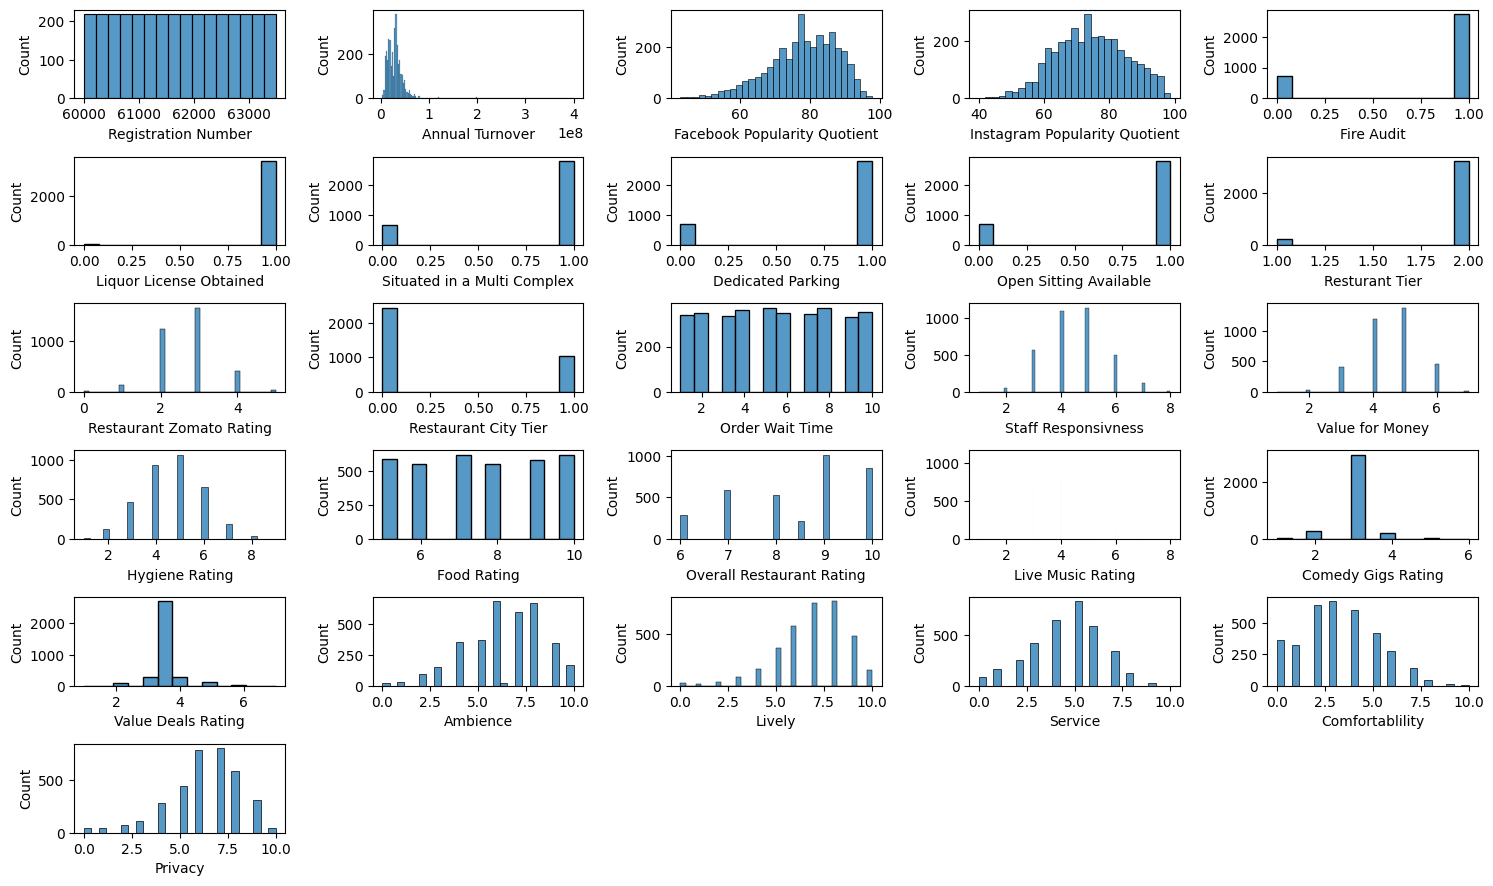

In [80]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = df_train_copy.select_dtypes(include=['number']).columns.tolist()
#print(features)
# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(7, 5, i+1)    # assign a subplot in the main plot
    sns.histplot(data=df_train_copy, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

**Creating Box Plot**

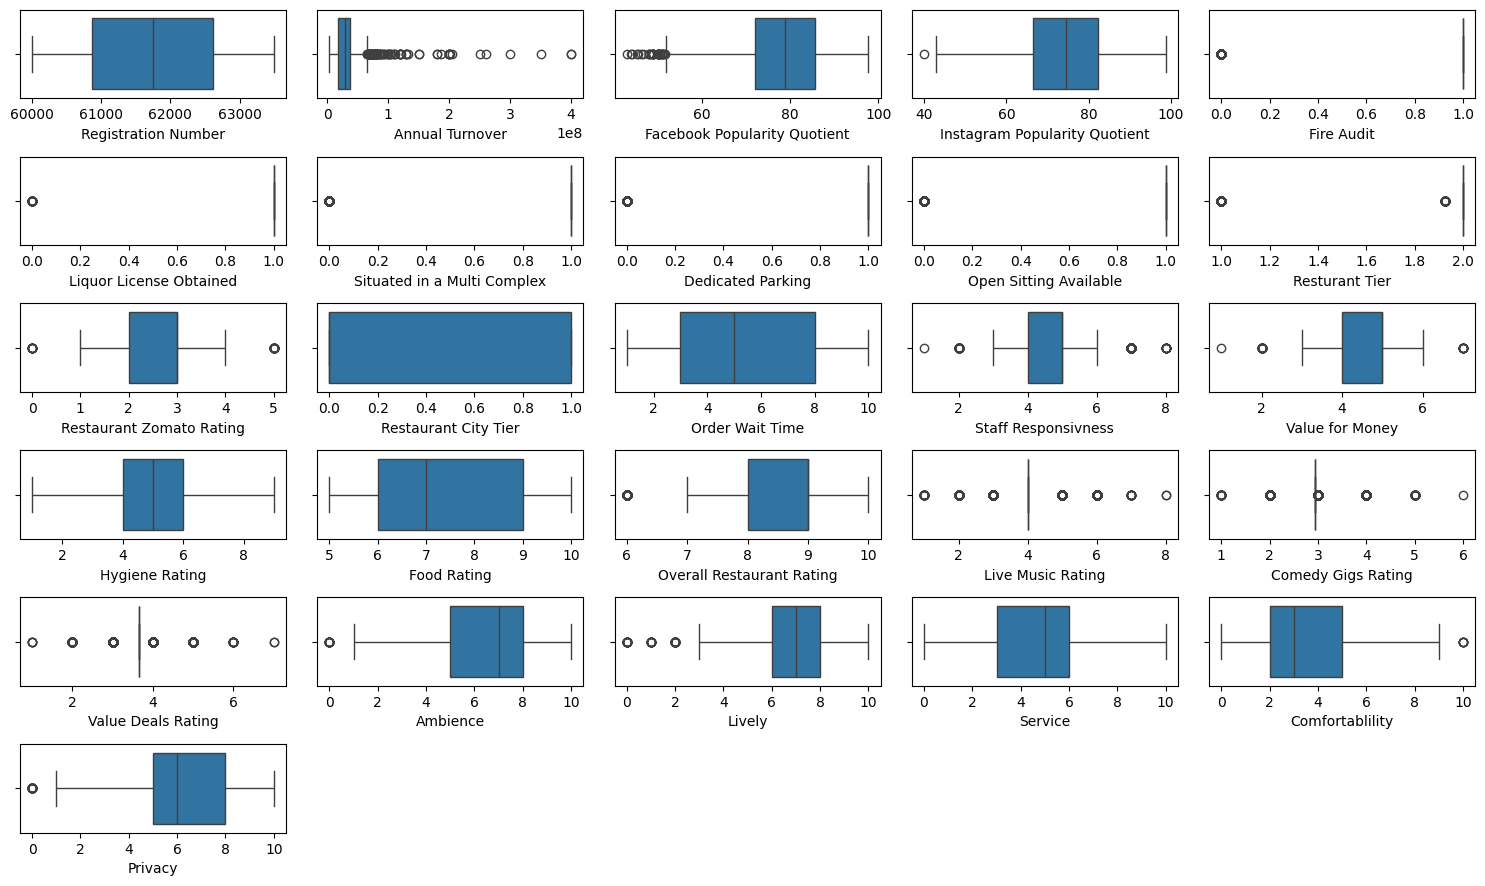

In [81]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = df_train_copy.select_dtypes(include=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(7, 5, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=df_train_copy, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

**Creating Bar plot**

In [86]:
# defining the figure size
plt.figure(figsize=(200, 100))

# defining the list of categorical features to plot
features = df_train_copy.select_dtypes(exclude=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)    # assign a subplot in the main plot
    sns.countplot(data=df_train_copy, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

**Bivariate Analysis**

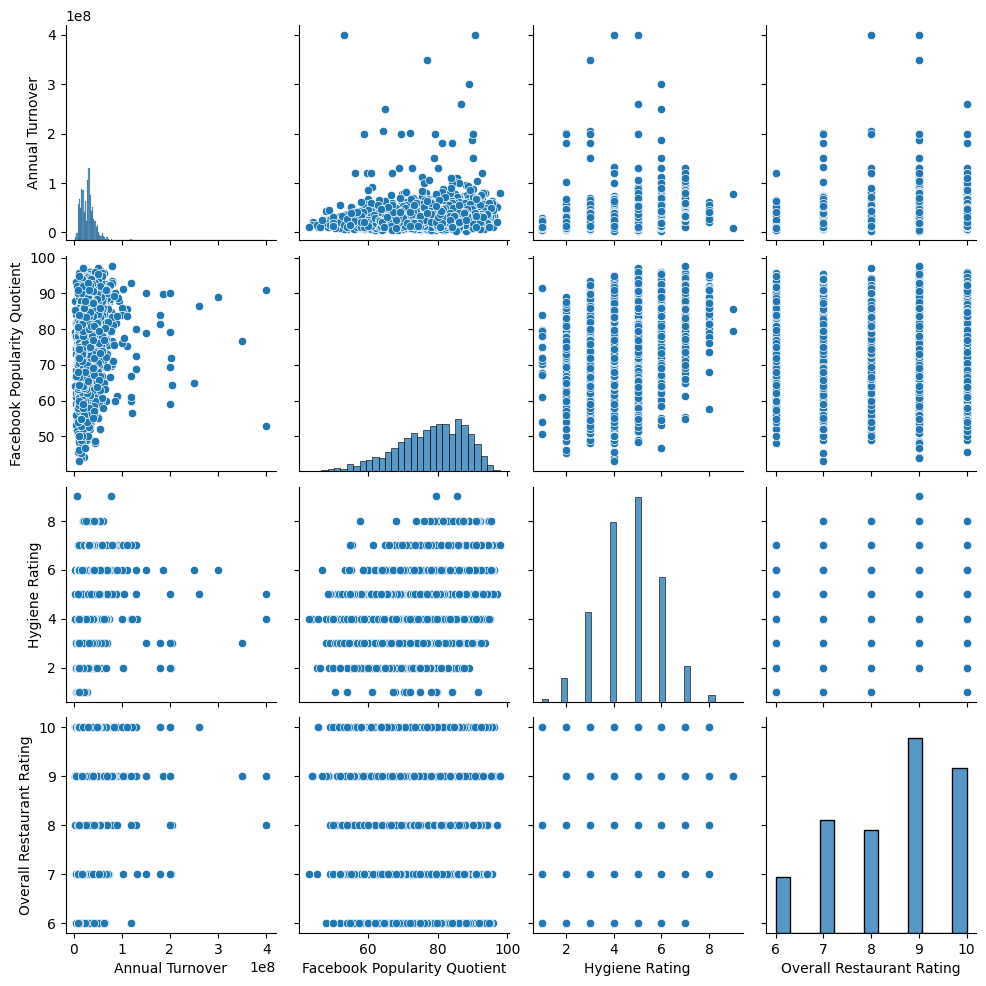

In [11]:
sns.pairplot(df_train_copy[['Annual Turnover','Facebook Popularity Quotient','Hygiene Rating','Overall Restaurant Rating']])

In [39]:
## Declaring the Linear Regression function

LR = LinearRegression()

In [ ]:
## Fitting the Linear Regression function

model = LR.fit(IPQ,df_train['Annual Turnover'])

In [ ]:
## Checking the score of the function on the training data

model.score(IPQ,df_train['Annual Turnover'])

0.026482712263984687

After looking the heatmap these independent variables ( **Facebook Popularity Quotient,Hygiene Rating ,Overall Restaurant Rating **) are the best fit for the simple linear regresion

as due to the Multicollinearity: Be careful not to include independent variables that are highly correlated with each other. For example, **Facebook Popularity Quotient and Instagram Popularity Quotient** are highly correlated (0.83), as are Overall** Restaurant Rating and other ratings like Hygiene Rating (0.42) and Food Rating (0.38).** Including both highly correlated variables can make the model unstable and difficult to interpret. You might want to choose just one of these or consider creating a composite variable.

In [42]:
# Model for Facebook Popularity Quotient
X_train_fpq=df_train_copy[['Facebook Popularity Quotient']]
y_train=df_train_copy[['Annual Turnover']]
model_fpq=LR.fit(X_train_fpq,y_train)

In [43]:
#checking the score of the model_fpq
model_fpq.score(X_train_fpq,y_train)

0.026429952241711296

In [44]:
# Model for Hygiene Rating
X_train_hyr=df_train_copy[['Hygiene Rating']]
y_train=df_train_copy[['Annual Turnover']]
model_hyr=LR.fit(X_train_hyr,y_train)

In [45]:
#checking the score for model hygine rating
model_hyr.score(X_train_hyr,y_train)

0.045740033161403626

model for Overall Restaurant Rating

In [46]:
# Model for Overall Restaurant Rating
X_train_orr=df_train_copy[['Overall Restaurant Rating']]
y_train=df_train_copy[['Annual Turnover']]
model_orr=LR.fit(X_train_orr,y_train)

In [47]:
#checking the score forOverall Restaurant Rating
model_hyr.score(X_train_orr,y_train)

0.012792477714576922

# Loading the Test Data and using the Test Data to Predict the target Variable

In [ ]:
df_test = pd.read_csv('D:/Hackathon/Test dataset.csv')
df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


**Heat Map**

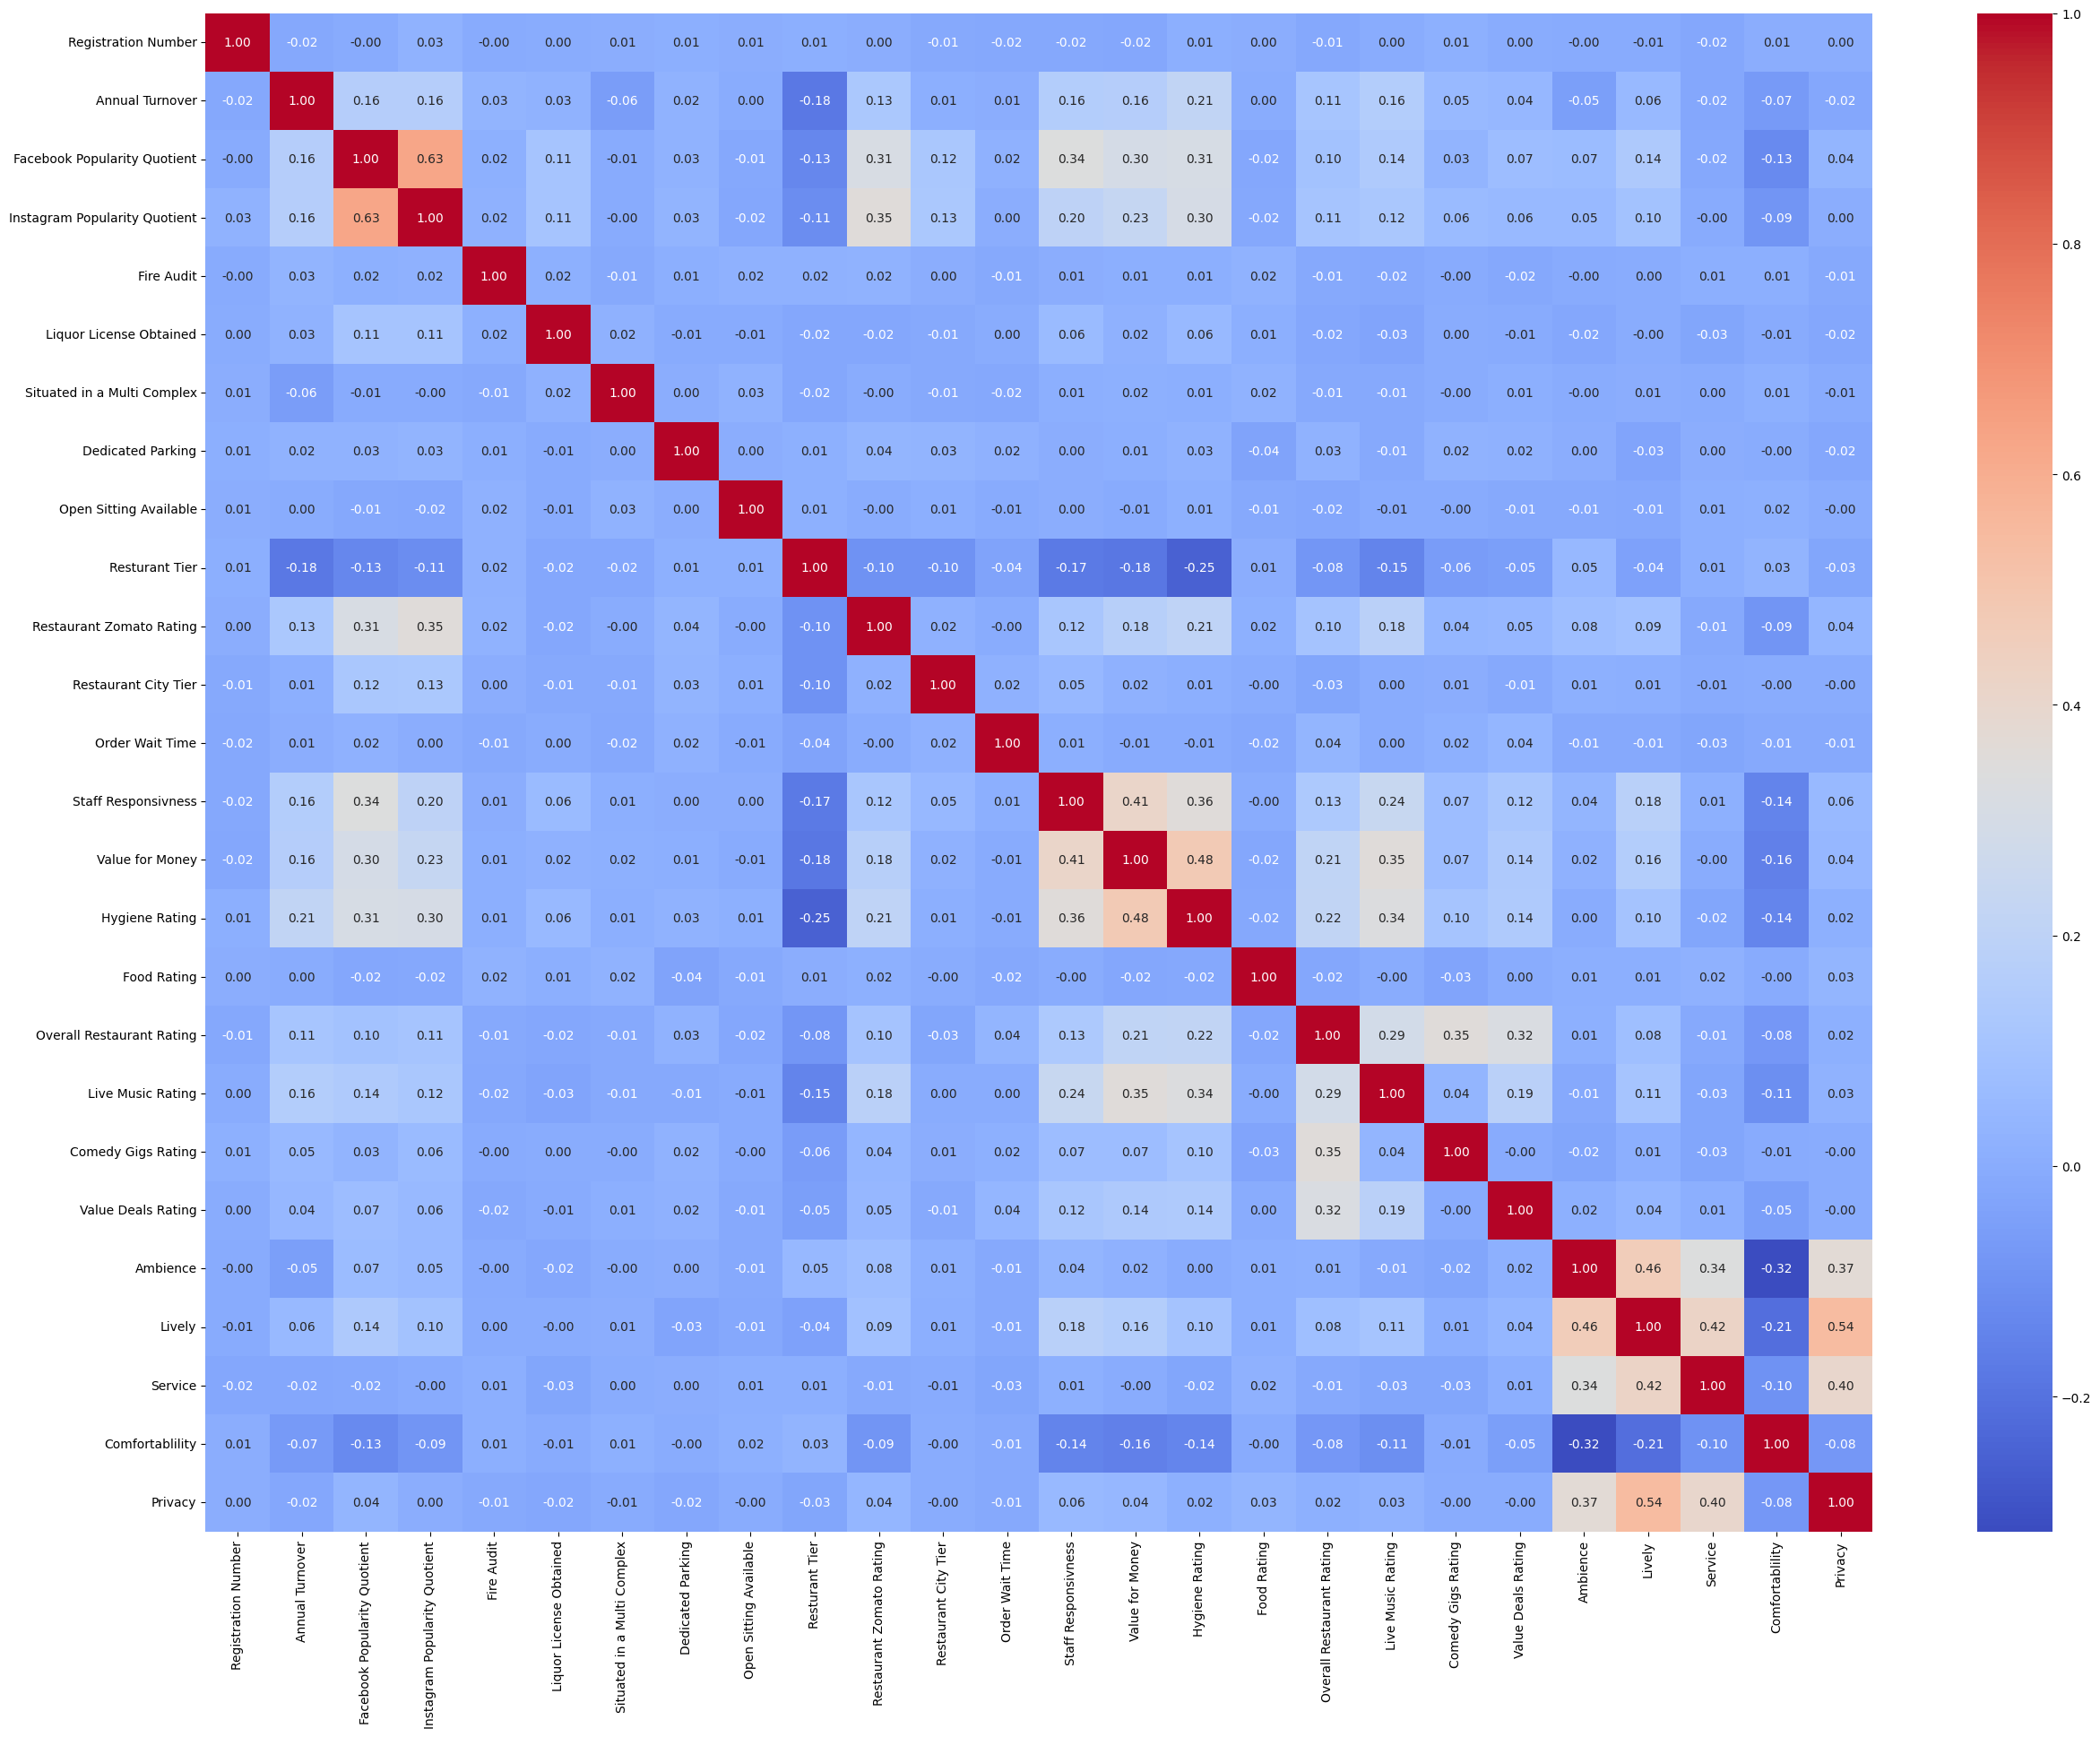

In [88]:
# defining the figure size
plt.figure(figsize=(30, 22))

# plotting the correlation heatmap
sns.heatmap(df_train_copy.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

In [ ]:
## Checking for the null values

df_test.isnull().sum()

Registration Number                0
Cuisine                            0
City                               0
Restaurant Location                0
Opening Day of Restaurant          0
Facebook Popularity Quotient       0
Endoresed By                       0
Instagram Popularity Quotient      0
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     0
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating         34
Live Music Rating                102
Comedy Gigs Rating               370
Value Deals Rating               385
L

In [ ]:
## Using the model built on the Training set to predict on the Test Set

prediction = model.predict(df_test[['Instagram Popularity Quotient']])
prediction

array([28970960.71768262, 37737095.60304943, 34490378.9788395 ,
       30724187.69475598, 34639727.94355315, 25759957.976339  ,
       23906082.78391513, 27347602.40557766, 31243662.35462957,
       27448250.62092816, 30399516.03233499, 33711166.98902911,
       35139722.30368149, 31081326.52341907, 29078102.36628155,
       27724221.53398601, 33776101.32151331, 27867077.06545124,
       34165707.31641851, 28191748.72787223, 28646289.05526163,
       33516363.99157652, 27996945.73041964, 27996945.73041964,
       31935212.99558628, 26308653.08583048, 36373474.62088126,
       35139722.30368149, 32996889.33170293, 35789065.62852347,
       27120332.24188296, 31243662.35462957, 36146204.45718656,
       36535810.45209175, 31243662.35462957, 22802199.13168376,
       32542349.00431354, 29490435.37755621, 28743690.55398792,
       24360623.11130452, 36730613.44954436, 27802142.73296705,
       29321606.11309729, 27802142.73296705, 35983868.62597606,
       31568334.01705056, 27672274.06799

# Saving the output in a data frame and then exporting it to a '.csv' file with the appropriate 'Registration Number'.

In [ ]:
solution_df = pd.DataFrame(df_test['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [ ]:
solution_df['Annual Turnover'] = prediction
solution_df

,Registration Number,Annual Turnover
0,20001,2.897096e+07
1,20002,3.773710e+07
2,20003,3.449038e+07
3,20004,3.072419e+07
4,20005,3.463973e+07
...,...,...
495,20496,2.994498e+07
496,20497,2.395478e+07
497,20498,2.975017e+07
498,20499,3.770463e+07


In [ ]:
## Setting the directory to export the file as a '.csv'

import os
os.chdir('D:/Hackathon')

In [ ]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df.to_csv('Submission.csv',index=False)

# END